2-electron Hubbard model with detuning
====================================

We have a double well potential, with detuning $\Delta\epsilon = \epsilon_L - \epsilon_R$. The left well has energy $\epsilon_L$ and the right well has energy $\epsilon_R$. There is a tunneling energy $-t$ and on-site repulsion energy $U$.

here we assume $\Delta\epsilon=0$. We denote the basis states as:
$$
|LL>\\
|LR>\\
|RL>\\
|RR>
$$
here $|L>_i, |R>_i, i=1,2$ is the state where the i'th electron is in the left well and right well, respectively.

The "physical" basis states as:
1. triplet state:
$$
|T_0>=\frac{1}{\sqrt{2}}(|LR>-|RL>)
$$
2. singlet left, right, 0 state:
$$
|S_L>=|LL> \\
|S_R>=|RR> \\
|S_0>=\frac{1}{\sqrt{2}}(|LR>+|RL>)
$$
the Hamiltonian we write in single quantization to make our lives easier, and because we already separated spin from orbital states. We have:
$$
H = h_1 + h2 + h_{12}
$$
where:
$$
\begin{align}
h_1 &= \left[-t\left(|L_1><R_1| + |R_1><L_1|\right) + \epsilon(|L_1><L_1| + |R_1><R_1|)\right]\otimes \mathbb{1}_2 \\
h_2 &= \mathbb{1}_1 \otimes \left[-t\left(|L_2><R_2| + |R_2><L_2|\right) + \epsilon(|L_2><L_2| + |R_2><R_2|)\right] \\
h_{12} &= U(|LL><LL| + |RR><RR|)
\end{align}
$$

we want to calculate H in the basis of the physical states. But for that let's first calculate the matrix elements in the simple basis states.

The diagonals:
$$
\begin{align}
<LL|H|LL> &= 2\epsilon_L + U \\
<RR|H|RR> &= 2\epsilon_R + U \\
<LR|H|LR> &= \epsilon_L + \epsilon_R \\
<RL|H|RL> &= \epsilon_L + \epsilon_R
\end{align}
$$

The 2 electron exchange is 0 (if we wanted it to be non-zero we would need to have 2 electron interaction terms where it's non zero - the single electron hamiltonian parts are orthogonal in this basis):
$$
<LR|H|RL> = 0
$$

Similarly for the 2 electron swap:
$$
<LL|H|RR> = <RR|H|LL> = 0
$$

and now the "interesting" tunneling terms:
$$
<LL|H|LR> = -t \\
<LL|H|RL> = -t \\
<LR|H|RR> = -t \\
<RL|H|RR> = -t \\
$$
and their complex conjugates.

We are now ready to calculate $H$ in the physical basis:

$$
<T_0|H|T_0> = \frac{1}{2}(<LR|-<RL|)H(|LR>-|RL>) = \frac{1}{2}(2(\epsilon_L + \epsilon_R) + 0) = \epsilon_L + \epsilon_R \\
<S_0|H|S_0> = \frac{1}{2}(<LR|+<RL|)H(|LR>+|RL>) = \epsilon_L + \epsilon_R \\
<S_L|H|S_L> = <S_R|H|S_R> = 2\epsilon_{L,R} + U
$$

and: 
$$
<T_0|H|S_0> = 0
$$
similarly all the terms between the singlet and triplet states are zero because they are different symmetry states.

Finally,
$$
<S_0|H|S_L> = -\sqrt{2}t
$$

Thus the full Hamiltonain of the problem (for zero detuning) in the basis $(|T_0>, |S_0>, |S_L>, |S_R>)$ is:

$$
H = 
\begin{pmatrix}
\epsilon_L + \epsilon_R & 0 & 0 & 0 \\
0 & \epsilon_L + \epsilon_R & -\sqrt{2}t & -\sqrt{2}t \\
0  & -\sqrt{2}t & 2\epsilon_L + U & -\sqrt{2}t \\
0  & -\sqrt{2}t  & -\sqrt{2}t & 2\epsilon_R + U
\end{pmatrix}
$$

we can subtract $\epsilon_L + \epsilon_R$, to get:

$$
H = 
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & -\sqrt{2}t & -\sqrt{2}t \\
0  & -\sqrt{2}t & \Delta\epsilon + U & -\sqrt{2}t \\
0  & -\sqrt{2}t  & -\sqrt{2}t & -\Delta\epsilon + U
\end{pmatrix}
$$

The ground state energy of this Hamiltonian at zero detuning is:

$$
E_g = \frac{1}{2}U - \sqrt{4t^2 + \frac{1}{4}U^2}
$$

when $t \gg U$, we're pretty similar to the non-interacting model, and the energy becomes:

$$
E_g \simeq -2t + \frac{1}{2}U
$$

this is consistent with a Hartree approximation where we just take the noninteracting $-2t$ and add to it the average coulomb repulsion when the two electrons are in the same state (which has probability 1/2).

when $U \gg t$, we have the interesting situation where the energy is dominated by repulsion and we have the typical exchange energy case:

$$
E_g \simeq -\frac{8t^2}{U} \equiv J
$$




we can set $U=1$, and then we have two parameters: $t/U$ and $\Delta\epsilon/U$. Let's look at the energy levels:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calc_energies(tU, epsU):
    tun = -np.sqrt(2) *tU
    H=np.array([[0, 0,   0,        0],
                [0, 0,   tun,      tun],
                [0, tun, 1 + epsU, tun],
                [0, tun, tun, 1 - epsU]])
    return np.linalg.eigh(H)

here we plot only the two lowest energy levels, which are the singlet and triplet, as a function of t/U. As we decrease t/U, the weight of the $|LL>$ and $|RR>$ states decreases. For $U=0$, it's just the non-interacting state: 

Analysis at zero detuning
-------------------------

Text(0.5, 1.0, 'two lowest energies at zero detuning')

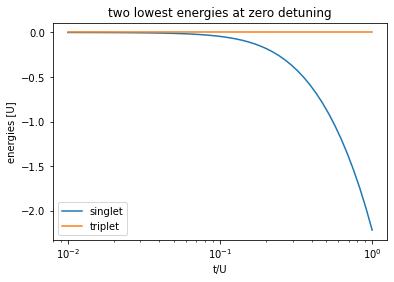

In [4]:
tU_vec = np.logspace(-2, 0)
energies = [calc_energies(tU, 0.)[0][:2] for tU in tU_vec]
plt.semilogx(tU_vec, energies)
plt.xlabel("t/U")
plt.ylabel("energies [U]")
plt.legend(("singlet", "triplet"))
plt.title("two lowest energies at zero detuning")

and here are the probabilities of the $|S_0> = \frac{1}{\sqrt{2}}(|LR> + |RL>)$ (Heitler-London) state vs. the $|LL>$, $|RR>$ states:

In [5]:
calc_energies(0.55, 0.)[1].T[0][1:3] ** 2

array([0.55024047, 0.22487976])

Text(0.5, 1.0, 'state probabilities at lowest energies')

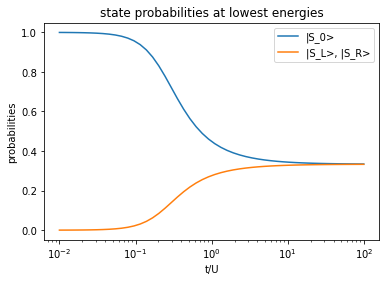

In [6]:
tU_vec = np.logspace(-2, 2)
probs = [calc_energies(tU, 0.)[1].T[0][1:3] ** 2 for tU in tU_vec]
plt.semilogx(tU_vec, probs)
plt.xlabel("t/U")
plt.ylabel("probabilities")
plt.legend(("|S_0>", "|S_L>, |S_R>"))
plt.title("state probabilities at lowest energies")

Effect of detuning
------------------

Let's fix t/U to some reasonable value and look at the effect of detuning. We can see that there is not much effect until the detuning becomes stronger than $U$, in which case it starts to dominate.

Text(0.5, 1.0, 'two lowest energies vs detuning at t/U = 0.1')

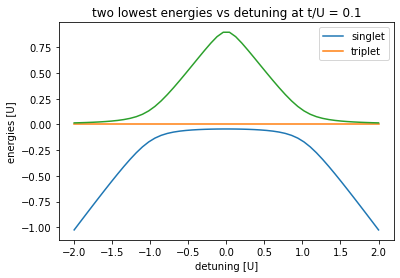

In [7]:
epsilon_vec = np.linspace(-2, 2)
energies = [calc_energies(0.1, eps)[0][:3] for eps in epsilon_vec]
plt.plot(epsilon_vec, energies)
plt.xlabel("detuning [U]")
plt.ylabel("energies [U]")
plt.legend(("singlet", "triplet"))
plt.title("two lowest energies vs detuning at t/U = 0.1")

Text(0.5, 1.0, 'state probabilities at lowest energies')

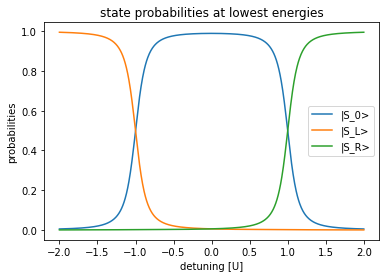

In [38]:
epsilon_vec = np.linspace(-2, 2, 1000)
probs = [calc_energies(0.05, eps)[1].T[0][1:4] ** 2 for eps in epsilon_vec]
plt.plot(epsilon_vec, probs)
plt.xlabel("detuning [U]")
plt.ylabel("probabilities")
plt.legend(("|S_0>", "|S_L>", "|S_R>"))
plt.title("state probabilities at lowest energies")

## How it looks in the literature

for example in this paper: https://qudev.phys.ethz.ch/static/content/courses/QSIT09/pdfs/Petta2005.pdf

for a reason I don't understand they add $\epsilon / 2$ to the diagram, and look at $\epsilon/U - 1$. I don't know why. Otherwise it's the same. I think the splitting at $\epsilon/U = 1$ scales like $t^2/U$. As can be seen in the figure above, at this point the states $|RR>$ and $|S_0>$ have the same probability.

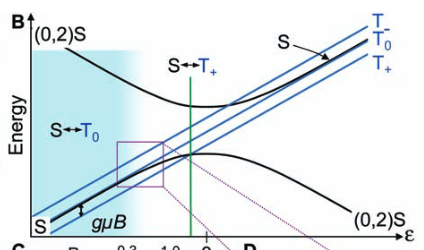

(0.0, 1.0)

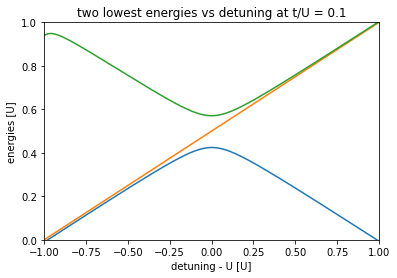

In [33]:
epsilon_vec = np.linspace(-2, 2, 1000)
energies = [calc_energies(0.05, eps)[0][:3] + 0.5 * eps for eps in epsilon_vec]
plt.plot(epsilon_vec - 1, energies)
plt.xlabel("detuning - U [U]")
plt.ylabel("energies [U]")
plt.title("three lowest energies vs detuning at t/U = 0.1")
plt.xlim((-1.0, 1.0))
plt.ylim((0.0, 1.0))

The full diagram looks like this. I am putting very small $t/U$ because I want to show that there are effectively 4 levels here: The $S_0$ state and $T_0$ states which are not affected by detuning, and the S_L and S_R states (the latter is the (0,2) state) which is. The continuous energy levels cross from

Text(0.5, 1.0, 'two lowest energies vs detuning at t/U = 0.1')

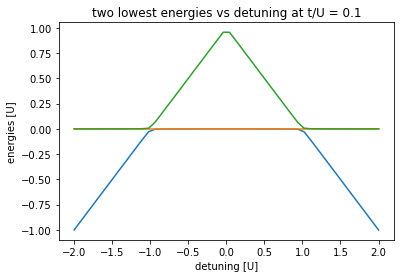

In [28]:
epsilon_vec = np.linspace(-2, 2)
energies = [calc_energies(0.01, eps)[0][:3] for eps in epsilon_vec]
plt.plot(epsilon_vec, energies)
plt.xlabel("detuning [U]")
plt.ylabel("energies [U]")
plt.title("two three energies vs detuning at t/U = 0.01")

## States at the avoided crossing point

At the avoided crossing point $\Delta\epsilon/U = 1$ the Hamltonian is:

The eigenstates at the avoided crossing point are:

$$
H = 
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & -\sqrt{2}t & -\sqrt{2}t \\
0  & -\sqrt{2}t & 2U & -\sqrt{2}t \\
0  & -\sqrt{2}t  & -\sqrt{2}t & 0
\end{pmatrix}
$$

The eigenstates are as follows. We see that the lower branch is the symmetric combination of $|S_0>$ and $|S_R>$ while the upper branch is the antisymmetric combination.



In [51]:
for i in range(4):
    energy = np.around(calc_energies(0.01, 1)[0][i], 4)
    state = np.around(calc_energies(0.01, 1)[1].T[i], 4)
    print(f"for energy = {energy}, state = {state}\n")

for energy = -0.0143, state = [0.     0.7071 0.0099 0.7071]

for energy = 0.0, state = [1. 0. 0. 0.]

for energy = 0.0141, state = [ 0.     -0.7071 -0.      0.7071]

for energy = 2.0002, state = [ 0.     0.007 -1.     0.007]



## Open questions

1. How do the hyperfine fields mix two states that have spin 0?